In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [1]:
#!pip3 install scipy==1.1.0
#!pip install texttable

#from google.colab import drive
#drive.mount('/gdrive')
# %cd /gdrive

import configparser
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from six.moves import cPickle
import os
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statistics as stats
import glob
from texttable import Texttable

#import matplotlib
#matplotlib.use('Agg')

import copy
from sklearn import metrics
import seaborn
import tensorflow as tf
import keras
import keras.backend.tensorflow_backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.engine.topology import Input
from keras.optimizers import Adam
from keras import regularizers
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from vis.visualization import visualize_activation, visualize_saliency, visualize_cam
from vis.utils import utils
from keras import activations

from IPython.display import HTML, display
import tqdm
import json
from sklearn.metrics import roc_curve, auc, confusion_matrix
import datetime
from astropy.time import Time
from tensorflow.keras.models import model_from_json, load_model
from tensorflow.keras.utils import normalize as tf_norm

import io
import gzip
from astropy.io import fits
#from bson.json_util import loads, dumps

import matplotlib.pyplot as plt
# plt.style.use(['dark_background'])
from pandas.plotting import register_matplotlib_converters, scatter_matrix
register_matplotlib_converters()
#%matplotlib inline

Using TensorFlow backend.


In [2]:
#classes=[1,2,4,5,6,8,13]
bins=10
#os.mkdir("blank_v2_test")
classes=[0, 1]
filterid={0:0, 1:1}
pd={0:'bogus', 1:'real'}

x=np.load("x_test.npy")
(l,m,n,o)=x.shape
y=np.load("y_test.npy")
p=np.load("preds_proba.npy")
pr=np.load("preds.npy")

In [3]:
x.shape

(1156, 63, 63, 3)

In [4]:
def vgg6(input_shape=(63, 63, 3), n_classes: int = 1):
    """
        VGG6
    :param input_shape:
    :param n_classes:
    :return:
    """

    model = keras.models.Sequential(name='VGG6')
    # input: 63x63 images with 3 channel -> (63, 63, 3) tensors.
    # this applies 16 convolution filters of size 3x3 each.
    model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape, name='conv1'))
    model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', name='conv2'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv3'))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv4'))
    model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(256, activation='relu', name='fc_1'))
    model.add(keras.layers.Dropout(0.5))
    # output layer
    activation = 'sigmoid' if n_classes == 1 else 'softmax'
    model.add(keras.layers.Dense(n_classes, activation=activation, name='fc_out'))

    return model

loss = 'sparse_categorical_crossentropy'
optimizer = 'adam'

image_shape = x.shape[1:]

binary_classification = True if loss == 'sparse_categorical_crossentropy' else False
n_classes = 2 if binary_classification else 1

model = vgg6(input_shape=image_shape, n_classes=n_classes)
# Swap softmax with linear
#layer_idx = utils.find_layer_idx(model, 'fc_out')
#model.layers[layer_idx].activation = activations.linear
#model = utils.apply_modifications(model)

# set up optimizer:
if optimizer == 'adam':
    optimzr = keras.optimizers.Adam(lr=3e-4, beta_1=0.9, beta_2=0.999,
                                       epsilon=None, decay=0.0, amsgrad=False)
elif optimizer == 'sgd':
    optimzr = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
else:
    print('Could not recognize optimizer, using Adam')
    optimzr = keras.optimizers.Adam(lr=3e-4, beta_1=0.9, beta_2=0.999,
                                       epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=optimzr, loss=loss, metrics=['accuracy'])
model.load_weights('model.h5')
print(model.summary())

W1012 20:13:46.556115 13720 deprecation_wrapper.py:119] From f:\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1012 20:13:46.833865 13720 deprecation_wrapper.py:119] From f:\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1012 20:13:46.898847 13720 deprecation_wrapper.py:119] From f:\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1012 20:13:46.900827 13720 deprecation_wrapper.py:119] From f:\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1012 20:13:46.906831 13720 deprecation_wrapper

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 61, 61, 16)        448       
_________________________________________________________________
conv2 (Conv2D)               (None, 59, 59, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 27, 27, 32)        4640      
_________________________________________________________________
conv4 (Conv2D)               (None, 25, 25, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
__________

In [10]:
diff_prob=np.zeros((l,m,n))

#c={1:0,2:1,4:2,5:3,6:4,8:5,13:6}
c={0:0, 1:1}

correct_classifications=np.where(y==pr)
threshold=np.where(p[correct_classifications[0]]>=0.8)

t=threshold
w=correct_classifications
m_a=diff_prob

In [11]:
for j in range(m):
    for k in range(n):
        x=np.load("x_test.npy")
        for i in range(len(t[0])):
            for q in range(o):
                x[w[0][t[0][i]],j,k,q]=0.0
        y_test=model.predict(x)
        #y_test=np.concatenate((1-y_test, y_test), axis=1)
        for i in range(len(t[0])):
            m_a[w[0][t[0][i]],j,k]=y_test[w[0][t[0][i]],c[y[w[0][t[0][i]]]]]-p[w[0][t[0][i]],c[y[w[0][t[0][i]]]]]
        print(j*k)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
168
171
174
177
180
183
186
0
4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96
100
104
108
112
116
120
124
128
132
136
140
144
148
152
156
160
164
168
172
176
180
184
188
192
196
200
204
208
212
216
220
224
228
232
236
240
244
248
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
10

990
1023
1056
1089
1122
1155
1188
1221
1254
1287
1320
1353
1386
1419
1452
1485
1518
1551
1584
1617
1650
1683
1716
1749
1782
1815
1848
1881
1914
1947
1980
2013
2046
0
34
68
102
136
170
204
238
272
306
340
374
408
442
476
510
544
578
612
646
680
714
748
782
816
850
884
918
952
986
1020
1054
1088
1122
1156
1190
1224
1258
1292
1326
1360
1394
1428
1462
1496
1530
1564
1598
1632
1666
1700
1734
1768
1802
1836
1870
1904
1938
1972
2006
2040
2074
2108
0
35
70
105
140
175
210
245
280
315
350
385
420
455
490
525
560
595
630
665
700
735
770
805
840
875
910
945
980
1015
1050
1085
1120
1155
1190
1225
1260
1295
1330
1365
1400
1435
1470
1505
1540
1575
1610
1645
1680
1715
1750
1785
1820
1855
1890
1925
1960
1995
2030
2065
2100
2135
2170
0
36
72
108
144
180
216
252
288
324
360
396
432
468
504
540
576
612
648
684
720
756
792
828
864
900
936
972
1008
1044
1080
1116
1152
1188
1224
1260
1296
1332
1368
1404
1440
1476
1512
1548
1584
1620
1656
1692
1728
1764
1800
1836
1872
1908
1944
1980
2016
2052
2088
2124
2160


2928
2989
3050
3111
3172
3233
3294
3355
3416
3477
3538
3599
3660
3721
3782
0
62
124
186
248
310
372
434
496
558
620
682
744
806
868
930
992
1054
1116
1178
1240
1302
1364
1426
1488
1550
1612
1674
1736
1798
1860
1922
1984
2046
2108
2170
2232
2294
2356
2418
2480
2542
2604
2666
2728
2790
2852
2914
2976
3038
3100
3162
3224
3286
3348
3410
3472
3534
3596
3658
3720
3782
3844


In [14]:
np.save("m_a.npy", m_a)

In [5]:
y_test=model.predict(x)

In [24]:
np.concatenate((1-y_test, y_test), axis=1)

array([[8.9081645e-02, 9.1091835e-01],
       [6.1014295e-03, 9.9389857e-01],
       [3.0755997e-04, 9.9969244e-01],
       ...,
       [9.2708594e-01, 7.2914086e-02],
       [5.5703044e-02, 9.4429696e-01],
       [9.9999982e-01, 1.4969649e-07]], dtype=float32)

In [9]:
p

array([[5.2904855e-02, 9.4709510e-01],
       [1.1248548e-03, 9.9887508e-01],
       [8.6592603e-03, 9.9134070e-01],
       ...,
       [9.3333697e-01, 6.6662967e-02],
       [2.6414865e-01, 7.3585135e-01],
       [9.9997604e-01, 2.3914930e-05]], dtype=float32)

KeyboardInterrupt: 

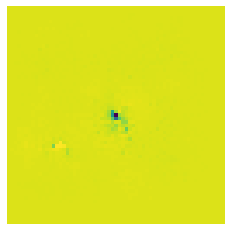

In [18]:
clss='real'
#os.mkdir("blanking")
#os.mkdir("keras-vis/bogus/")
os.mkdir("keras-vis/real/blanking/")
#os.mkdir("blanking/"+clss+"/dmdt/")
#os.mkdir("blanking/"+clss+"/blank/")

#%matplotlib inline
for i in range(x.shape[0]):
  if y[i]==pr[i] and max(p[i])>=0.8 and pr[i]==1:
    #plt.figure()
    #plt.axis("off")
    #plt.imshow(x[i][:,:,0])
    #plt.savefig("blanking/"+clss+"/dmdt/"+str(i)+".png", bbox_inches='tight', transparent="True", pad_inches=0)
    #plt.close()
    plt.figure()
    plt.imshow(m_a[i])
    plt.axis("off")
    plt.savefig("keras-vis/real/blanking/"+str(i)+".png", bbox_inches='tight', transparent="True", pad_inches=0)
    plt.close()

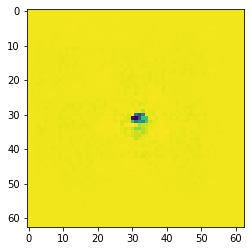

In [16]:
plt.imshow(m_a[0])

In [13]:
np.where(y==1)

(array([   0,    1,    2, ..., 9123, 9124, 9125], dtype=int64),)

In [8]:
%cd /content/
!git clone https://github.com/affinelayer/pix2pix-tensorflow.git
%cd pix2pix-tensorflow

/content
Cloning into 'pix2pix-tensorflow'...
remote: Enumerating objects: 261, done.
remote: Total 261 (delta 0), reused 0 (delta 0), pack-reused 261
Receiving objects: 100% (261/261), 13.33 MiB | 14.34 MiB/s, done.
Resolving deltas: 100% (103/103), done.
/content/pix2pix-tensorflow


In [26]:
!python pix2pix-tensorflow-master/tools/process.py \
  --input_dir "blanking/EW/dmdt/" \
  --b_dir "blanking/EW/blank/" \
  --operation combine \
  --output_dir "blanking/EW/combined/"

skipping 4482 files that already exist
processing 0 files


W0623 08:52:34.001270  2428 deprecation_wrapper.py:119] From C:\Users\Meet\Desktop\xai\pix2pix-tensorflow-master\tools\tfimage.py:22: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.

W0623 08:52:34.002269  2428 deprecation_wrapper.py:119] From C:\Users\Meet\Desktop\xai\pix2pix-tensorflow-master\tools\tfimage.py:23: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 08:52:34.124065  2428 deprecation.py:323] From F:\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\math_ops.py:3743: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 08:52:34.136681  2428 deprecation.py:323] From F:\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\math_ops.py:3744: setdiff1d (from tensorflow.python.ops.array_ops) 